# Advanced Feature Detection
Using OpenCV and keypoint matching to detect markers in scene images.

## Introduction
In this notebook, we use OpenCV to detect whether a specific marker image is present in a set of scene images. We use feature detection techniques such as SIFT, ORB, and AKAZE to extract keypoints and match them.

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Function to display image with matplotlib
def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()


## Load Marker Image and Extract Keypoints
Prompt the user for a marker image and extract keypoints using SIFT, ORB, or AKAZE.

Enter path to marker image:  C:\Users\richi\Desktop\Capella\CSC-FPX4040\Assessment 5\resources-image-descriptors\image-descriptors_marker_image.png
Choose descriptor (sift, orb, akaze):  sift


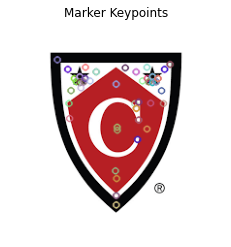

In [4]:
marker_path = input("Enter path to marker image: ").strip()
descriptor_choice = input("Choose descriptor (sift, orb, akaze): ").strip().lower()

img_marker = cv2.imread(marker_path)
gray_marker = cv2.cvtColor(img_marker, cv2.COLOR_BGR2GRAY)

if descriptor_choice == "sift":
    detector = cv2.SIFT_create()
elif descriptor_choice == "orb":
    detector = cv2.ORB_create()
elif descriptor_choice == "akaze":
    detector = cv2.AKAZE_create()
else:
    raise ValueError("Invalid descriptor choice.")

kp_marker, des_marker = detector.detectAndCompute(gray_marker, None)
img_marker_kp = cv2.drawKeypoints(img_marker, kp_marker, None)

show_image(img_marker_kp, title="Marker Keypoints")


## Match Keypoints to Scene Images
Prompt the user for a directory of scene images, and perform keypoint matching for each image.

Enter path to scene images folder:  C:\Users\richi\Desktop\Capella\CSC-FPX4040\Assessment 5\resources-image-descriptors\image-descriptors_scenes
Enter path for output folder:  C:\Users\richi\Desktop\Capella\CSC-FPX4040\Assessment 5\output


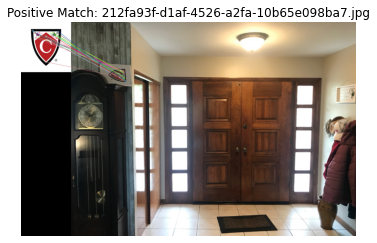

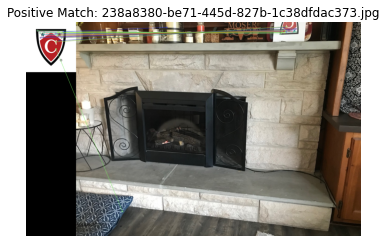

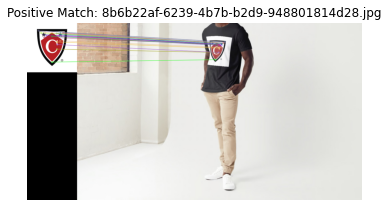

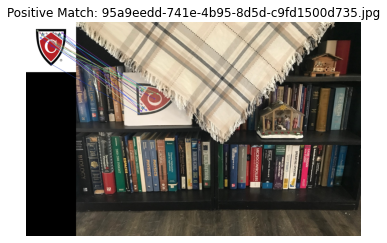

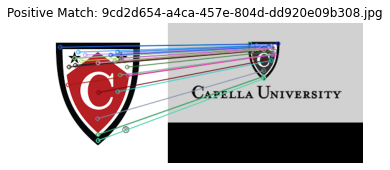

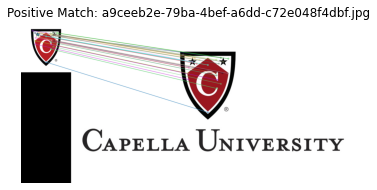

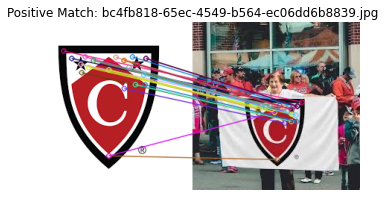

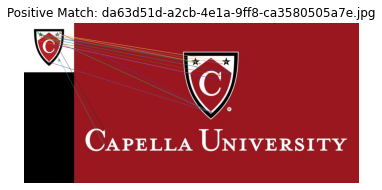

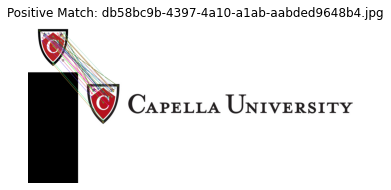

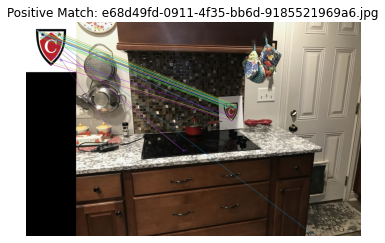

In [5]:
scene_dir = Path(input("Enter path to scene images folder: ").strip())
output_dir = Path(input("Enter path for output folder: ").strip())
positive_dir = output_dir / "Positives"
negative_dir = output_dir / "Negatives"
positive_dir.mkdir(parents=True, exist_ok=True)
negative_dir.mkdir(parents=True, exist_ok=True)

matcher = cv2.BFMatcher()

for scene_path in scene_dir.glob("*.*"):
    if scene_path.suffix.lower() not in ['.jpg', '.jpeg', '.png']:
        continue
    img_scene = cv2.imread(str(scene_path))
    gray_scene = cv2.cvtColor(img_scene, cv2.COLOR_BGR2GRAY)
    kp_scene, des_scene = detector.detectAndCompute(gray_scene, None)

    if des_scene is None:
        cv2.imwrite(str(negative_dir / scene_path.name), img_scene)
        continue

    matches = matcher.knnMatch(des_marker, des_scene, k=2)
    good = [m[0] for m in matches if len(m) == 2 and m[0].distance < 0.75 * m[1].distance]

    if len(good) > 10:
        img_match = cv2.drawMatches(img_marker, kp_marker, img_scene, kp_scene, good, None, flags=2)
        cv2.imwrite(str(positive_dir / scene_path.name), img_scene)
        show_image(img_match, title=f"Positive Match: {scene_path.name}")
    else:
        cv2.imwrite(str(negative_dir / scene_path.name), img_scene)


## Conclusion
The notebook demonstrates how to use image descriptors for pattern matching. Images were separated into positives and negatives based on the number of good keypoint matches.